* A model to predict the *sentiment* (Positive, Negative, or Neutral)

Loading the Exploring data 

In [18]:
# importing libraries

import pandas as pd 
import matplotlib.pyplot as plt


In [19]:
# reading the data and convert it to DataFrame
df = pd.read_csv("C:\\Users\\Dell\\Desktop\\NLP\Data\\YoutubeCommentsDataSet.csv")

df.head()

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Dell\AppData\Local\Temp\ipykernel_19764\4105376771.py:2: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("C:\\Users\\Dell\\Desktop\\NLP\Data\\YoutubeCommentsDataSet.csv")


,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [20]:
df.shape

(18408, 2)

In [21]:
df.isna().sum()

Comment      44
Sentiment     0
dtype: int64

In [22]:
df.dropna(inplace = True)

In [23]:
df["Sentiment"].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

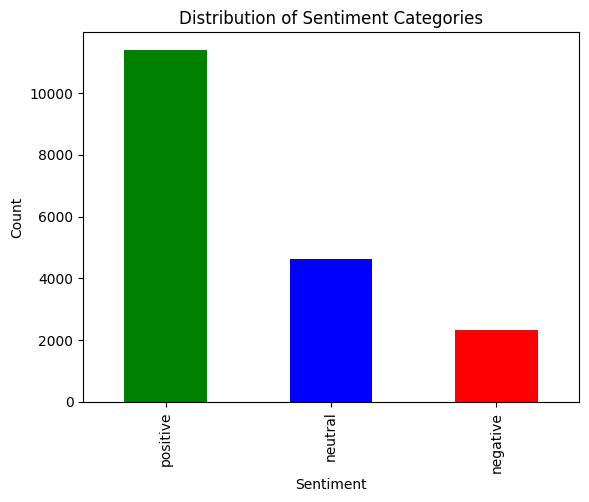

In [24]:
# A simple plot to show the amount of the comments in each category 

df["Sentiment"].value_counts().plot(kind="bar", color=["green", "blue", "red"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Distribution of Sentiment Categories")
plt.show()


In [25]:
# Convert text to lowercase
df["Comment"] = df["Comment"].str.lower()
df

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive
...,...,...
18403,i really like the point about engineering tool...,positive
18404,i’ve just started exploring this field and thi...,positive
18405,excelente video con una pregunta filosófica pr...,neutral
18406,hey daniel just discovered your channel a coup...,positive


In [26]:
# Remove punctuation & special characters
import re

df["Comment"] = df["Comment"].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))


In [28]:
# Remove stopwords  like "the," "is," "and" 
# that don’t contribute much to sentiment analysis

import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

df["Comment"] = df["Comment"].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # Keep the top 5000 words
X = vectorizer.fit_transform(df["Comment"]).toarray()  # Convert text to numbers
y = df["Sentiment"]  # Labels (positive, negative, neutral)


* The Model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7530628913694528
              precision    recall  f1-score   support

    negative       0.62      0.31      0.41       441
     neutral       0.61      0.57      0.59       912
    positive       0.81      0.91      0.86      2320

    accuracy                           0.75      3673
   macro avg       0.68      0.60      0.62      3673
weighted avg       0.74      0.75      0.74      3673



* The reason why the model did not perform well is because the given data is imbalanced, so I tried the following tachinc to fix that

In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new distribution
import collections
print(collections.Counter(y_resampled))


Counter({'neutral': 11402, 'negative': 11402, 'positive': 11402})


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8069277988892137
              precision    recall  f1-score   support

    negative       0.79      0.86      0.82      2222
     neutral       0.76      0.79      0.77      2287
    positive       0.88      0.78      0.83      2333

    accuracy                           0.81      6842
   macro avg       0.81      0.81      0.81      6842
weighted avg       0.81      0.81      0.81      6842



* The model performs well, but I tried to use different model to compare the performance 

In [33]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8677287342882198
              precision    recall  f1-score   support

    negative       0.86      0.92      0.89      2222
     neutral       0.85      0.85      0.85      2287
    positive       0.89      0.83      0.86      2333

    accuracy                           0.87      6842
   macro avg       0.87      0.87      0.87      6842
weighted avg       0.87      0.87      0.87      6842



* Saving the model 

In [34]:
import pickle

# To save the trained Random Forest model
with open("sentiment_model.pkl", "wb") as f:
    pickle.dump(model, f)

# to save the TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)


* Definitely there is a lot we can improve, I was thinking about applying hyperparameter tuning on the Random Forest model, but for now and for my simple project, I think that good enough.
* And that's it for the ML Model :)